In [11]:
# Helpful docs : https://huggingface.co/datasets/openclimatefix/uk_pv

In [12]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [13]:
metadata_df = pd.read_csv('data/uk_pv/metadata.csv')
metadata_df.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
0,2405,53.53,-1.63,E01007430,180.0,35.0,3.36,2010-11-18
1,2406,54.88,-1.38,E01008780,315.0,30.0,1.89,2010-12-03
2,2407,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
3,2408,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
4,2409,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03


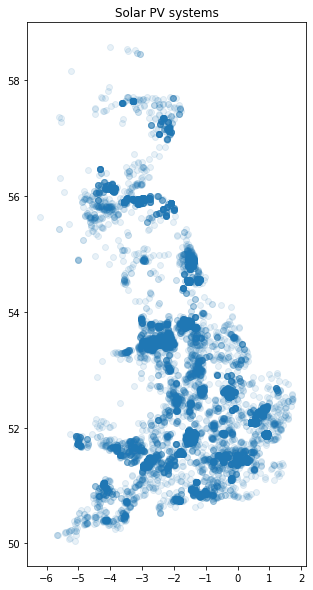

In [14]:
fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df.longitude_rounded, metadata_df.latitude_rounded, alpha=0.1)
plt.title("Solar PV systems");
#plt.savefig('images/pv_sites.jpg')

In [15]:
metadata_df

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
0,2405,53.53,-1.63,E01007430,180.0,35.0,3.36,2010-11-18
1,2406,54.88,-1.38,E01008780,315.0,30.0,1.89,2010-12-03
2,2407,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
3,2408,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
4,2409,54.88,-1.38,E01008780,225.0,30.0,1.89,2010-12-03
...,...,...,...,...,...,...,...,...
24657,27063,51.41,-2.49,E01014398,185.0,35.0,4.00,2018-04-18
24658,27064,51.47,-0.59,E01016588,180.0,45.0,2.00,2018-04-18
24659,27065,51.36,-2.93,E01014817,125.0,37.0,4.00,2018-04-18
24660,27066,51.44,-2.85,E01014759,165.0,35.0,4.00,2018-04-18


In [16]:
# PV sites for which there are readings

pv_power = xr.open_dataset("data/uk_pv/pv.netcdf", engine="h5netcdf")


In [17]:
ss_ids_with_readings = np.array(pv_power.data_vars)
ss_ids_with_readings = ss_ids_with_readings.astype(int)


print('How many SS have readings? ', len(ss_ids_with_readings))
print('How many PVs do we have metadata for? ', metadata_df.shape[0])

How many SS have readings?  1311
How many PVs do we have metadata for?  24662


In [18]:
metadata_df_with_readings = metadata_df[metadata_df['ss_id'].isin(ss_ids_with_readings)]
metadata_df_with_readings.head()

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
198,2603,51.70,-4.71,W01000610,210.0,32.0,3.96,2012-04-02
202,2607,52.44,-0.12,E01018211,200.0,35.0,2.94,2011-08-25
220,2625,50.38,-4.22,E01033294,190.0,38.0,2.35,2011-08-23
221,2626,54.99,-3.18,S00097762,270.0,22.0,3.60,2011-08-18
223,2628,50.99,-1.37,E01022706,225.0,34.0,1.38,2011-09-20


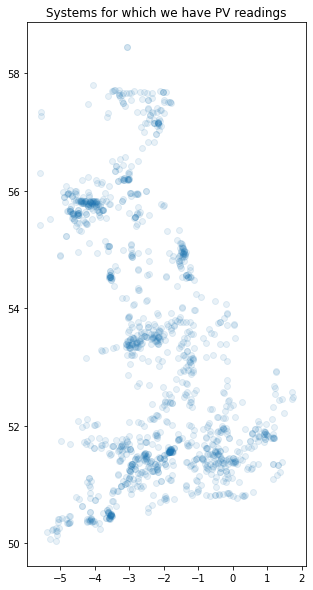

In [20]:
fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df_with_readings.longitude_rounded, metadata_df_with_readings.latitude_rounded, alpha=0.1)
plt.title("Systems for which we have PV readings");

Number of systems in crop : 7


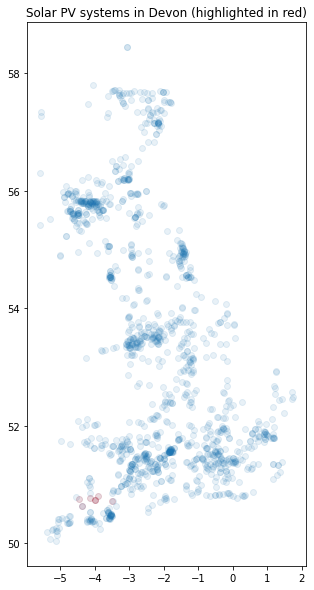

In [21]:
# Find some systems in Devon for which we actually have readings 

metadata_df = metadata_df_with_readings

longitude_cond = (metadata_df.longitude_rounded <= -3.5) & (metadata_df.longitude_rounded >= -4.5)
latitude_cond = (metadata_df.latitude_rounded <= 50.84) & (metadata_df.latitude_rounded >= 50.64)

devon_df = metadata_df[ (longitude_cond) &(latitude_cond)]
print('Number of systems in crop :', devon_df.shape[0])

fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df.longitude_rounded, metadata_df.latitude_rounded, alpha=0.1)
ax.scatter(devon_df.longitude_rounded, devon_df.latitude_rounded, alpha=0.1, color='red', label=devon_df.ss_id)

plt.title("Solar PV systems in Devon (highlighted in red)");

In [22]:
# the 7 systems in Devon

devon_df

,ss_id,latitude_rounded,longitude_rounded,llsoacd,orientation,tilt,kwp,operational_at
3039,5444,50.72,-3.50,E01019988,180.0,35.0,2.09,2012-05-18
4216,6621,50.80,-3.90,E01020326,180.0,30.0,3.99,2012-09-20
4430,6835,50.74,-4.00,E01020330,270.0,40.0,3.99,2012-10-10
4754,7159,50.64,-4.36,E01018949,160.0,32.0,3.92,2013-02-07
4840,7245,50.74,-4.01,E01020329,135.0,45.0,4.00,2013-02-18
4871,7276,50.77,-4.13,E01020322,180.0,30.0,3.92,2013-03-01
5358,7763,50.76,-4.46,E01018974,186.0,5.0,4.00,2013-08-21


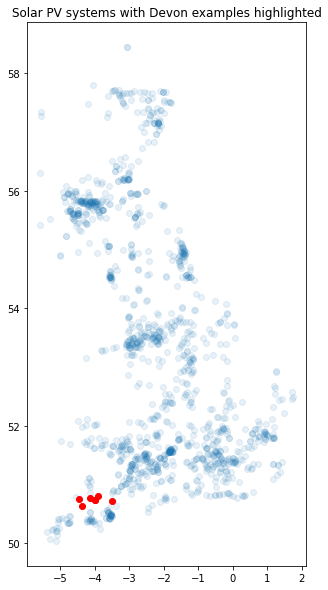

In [24]:
example_pvs = metadata_df[(metadata_df.ss_id == 20984) | (metadata_df.ss_id == 21832) | (metadata_df.ss_id == 6848)]

fig, ax = plt.subplots(figsize=(5,10))
ax.scatter(metadata_df.longitude_rounded, metadata_df.latitude_rounded, alpha=0.1)
ax.scatter(devon_df.longitude_rounded, devon_df.latitude_rounded, color='red')
plt.title("Solar PV systems with Devon examples highlighted");
plt.savefig('images/pv_sites.jpg')

In [26]:
pv_power = xr.open_dataset("data/uk_pv/pv.netcdf", engine="h5netcdf")

In [27]:
devon_ss_ids = devon_df.ss_id[:].values

In [28]:
devon_ss_ids

array([5444, 6621, 6835, 7159, 7245, 7276, 7763])

In [ ]:
len(devon_ss_ids)

7

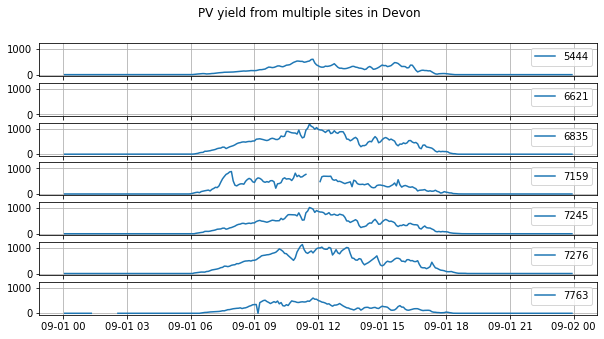

In [30]:

fig, axs = plt.subplots(7,1,figsize=(10,5), sharex=True, sharey=True)

for i in range(len(devon_ss_ids)):

    id = devon_ss_ids[i]

    on_pv_system = pv_power['{}'.format(id)].to_dataframe()
    on_pv_system = on_pv_system[on_pv_system.index < '2021-09-02']
    on_pv_system = on_pv_system[on_pv_system.index > '2021-09-01']

    axs[i].plot(on_pv_system, label=id)
    axs[i].legend()
    axs[i].grid(True)


#fig.tight_layout()
fig.suptitle('PV yield from multiple sites in Devon')
plt.show()


In [31]:
# Dropping 6621 as it generally has a zero reading

devon_ss_ids = devon_df.ss_id[:].values
devon_ss_ids = devon_ss_ids.tolist()
devon_ss_ids.remove(6621) # works in-place

In [37]:
# Average of all lines

comb_pv_system = pd.DataFrame()
id_count = 0

for id in devon_ss_ids:
    pv_system = pv_power['{}'.format(id)].to_dataframe()
    comb_pv_system = comb_pv_system.add(pv_system['{}'.format(id)])
    id_count += 1

comb_pv_system = comb_pv_system / id_count  

comb_pv_system = comb_pv_system[(comb_pv_system.index < '2021-06-05') & (comb_pv_system.index > '2021-06-01')]


<AxesSubplot:xlabel='datetime'>

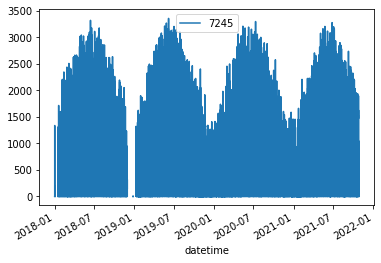

In [42]:
pv_power['7245'].to_dataframe().plot()

<AxesSubplot:xlabel='datetime'>

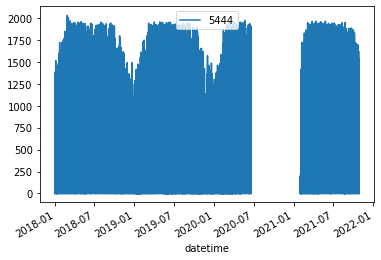

In [43]:
pv_power['5444'].to_dataframe().plot()

In [66]:
dataframes = []
for ss_id in devon_ss_ids:
    dataframes.append(pv_power['{}'.format(ss_id)].to_dataframe())

pv_df = pd.concat(dataframes, axis=1)
pv_df['Mean'] = pv_df.mean(axis=1)

NameError: name 'dv_df' is not defined

In [68]:
pv_df.shape[1]

7

In [78]:
pv_df.iloc[:,3]

datetime
2018-01-01 06:05:00    0.0
2018-01-01 06:10:00    0.0
2018-01-01 06:15:00    0.0
2018-01-01 06:20:00    0.0
2018-01-01 06:25:00    0.0
                      ... 
2021-10-27 23:35:00    0.0
2021-10-27 23:40:00    0.0
2021-10-27 23:45:00    0.0
2021-10-27 23:50:00    0.0
2021-10-27 23:55:00    0.0
Name: 7245, Length: 387254, dtype: float32

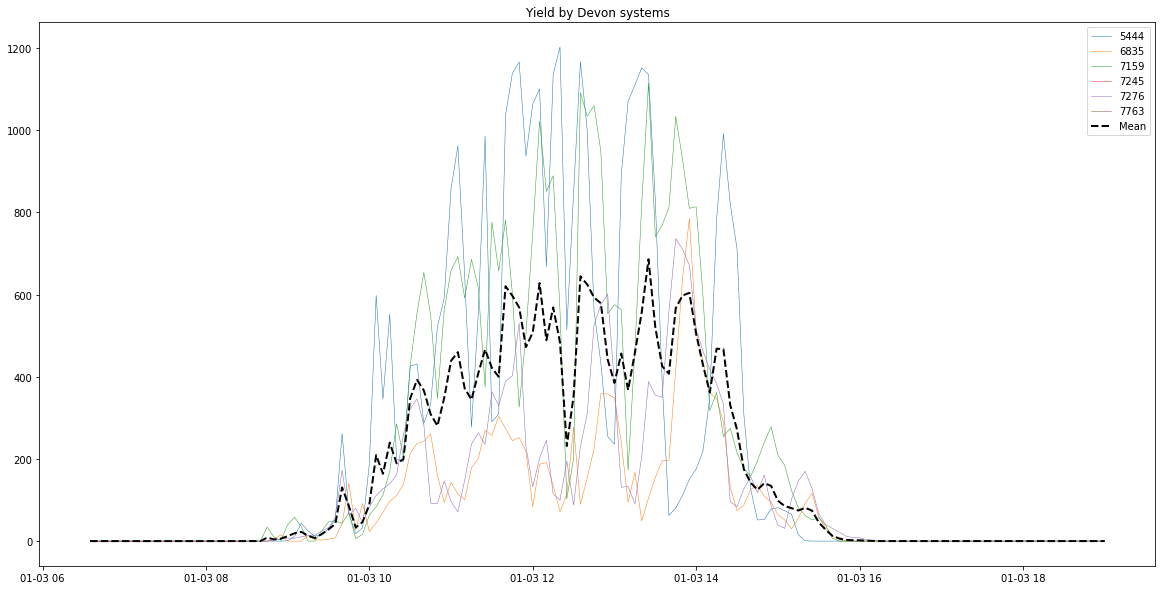

In [105]:

fig = plt.figure(figsize=(20,10))

pv_df_cropped = pv_df[330:480]

for i in range(pv_df_cropped.shape[1]-1):

    plt.plot(pv_df_cropped.iloc[:,i], label=pv_df_cropped.columns[i], linewidth=0.5)
    
plt.plot(pv_df_cropped.iloc[:,-1], "--", label='Mean', linewidth=2, color='black')

plt.legend()
plt.title('Yield by Devon systems');

#fig.legend();
